# Interactive bar plot (randomly-generated data)

The bar plot shows randomly-generated data. The bars are color coded based on the proportion of data that is below a selected threshold _y_. Click on the panel to change the threshold.

<IPython.core.display.Javascript object>


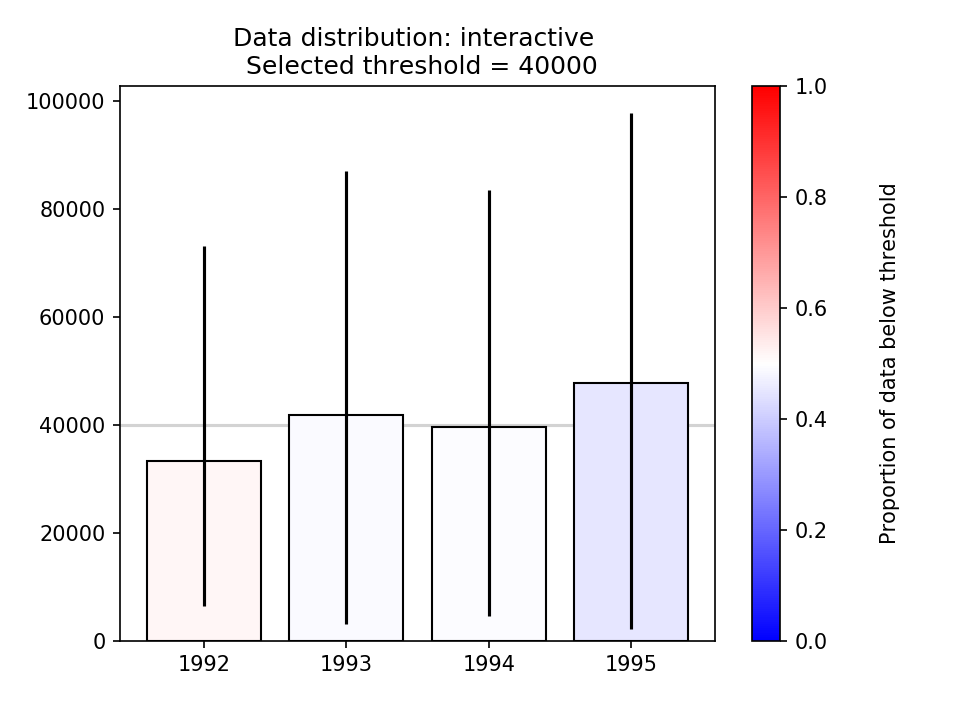

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df=df.T

yselect=40000
plt.figure()

def bar_plot(df,yselect):
    plt.clf()
    conf_interv=st.norm.interval(alpha=0.95, loc=df.mean(), scale=st.sem(df))
  
    loc=df<=yselect
    ycols=loc.sum()/len(df)

    my_cmap = plt.cm.get_cmap('bwr')
    colors = my_cmap(ycols)
    sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,1))
    sm.set_array([])

    plt.bar(range(len(df.columns)),df.mean(),yerr=conf_interv, color=colors, edgecolor='black')
    plt.axhline(y=yselect, zorder=0,color='lightgrey')
    plt.xticks(range(len(df.columns)), df.columns)
    cbar = plt.colorbar(sm)
    cbar.set_label('Proportion of data below threshold', labelpad=25)
    plt.gca().set_title('Data distribution: interactive \n Selected threshold = {}'.format(yselect))

bar_plot(df,yselect)
#plt.savefig('Assignment3_interactive.pdf',facecolor='w', edgecolor='w',
#        format='pdf')

def onclick(event):
    global iy
    iy = event.ydata
    bar_plot(df,iy)
    return iy

cid=plt.gcf().canvas.mpl_connect('button_press_event', onclick)
